In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
apple = pd.read_csv('../data_sets/day7/Apple_stock.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


1. 查看每一列的数据类型

In [3]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

2. 将Date这个列转换为datetime类型

In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

3. 将Date设置为索引

In [6]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


4. 有重复的日期吗？

In [9]:
apple.index.is_unique

True

5. 将index设置为升序

In [10]:
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


6. 找到每个月的最后一个交易日(business day)

In [35]:
apple_month = apple.resample('BM')
apple_month.asfreq()[:]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
1981-05-29,33.13,33.25,33.13,33.13,14845600.0,0.52
1981-06-30,26.13,26.13,26.00,26.00,8976800.0,0.41
1981-07-31,25.00,25.12,25.00,25.00,2738400.0,0.39
1981-08-31,20.13,20.25,20.13,20.13,10236800.0,0.31


7. 数据集中最早的日期和最晚的日期相差多少天？

In [17]:
(apple.index.max() - apple.index.min()).days

12261

8. 在数据中一共有多少个月？

In [24]:
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

9. 按照时间顺序可视化Adj Close值

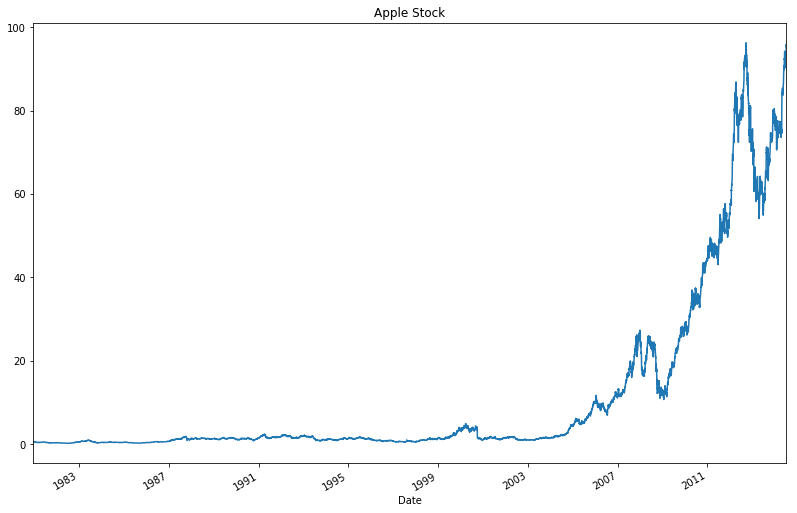

In [21]:
appl_open = apple['Adj Close'].plot(title = "Apple Stock")
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)